In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

# regardless of from where we run Jupyter Notebook, the curr working dir
# is personal/andrewe - i want to load pygolfdata from the location that's
# two directories above this one, so I'll modify the module search path
# to include that location. is there a better way to do this?
import sys
sys.path.append('../../')

from pygolfdata.data import shotlink

In [2]:
# data path - can be absolute, here is relative to the cwd of this file, 
# which is golf_course_project/personal/andrewe
data_path = '../../../golf_course_project_data'
test_data_path = '../../../golf_course_project_data/test'

In [3]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

# Augmented, also investigation for missing courselevels data for some courses

In [23]:
# the courselevels data for 2017 doesn't have wind data for every single possible
# course - at a quick glance, there are rows but no wind data for Erin Hills,
# and for four tournaments where some of the initial rounds are played on multiple
# course (for ex, the Pebble Beach Pro-Am, which is played on three courses at
# least, I think, for the first two days) there are no courselevels rows at all
# for the courses that are only used on Thursday and Friday; for now I'll just
# hardcode the expected nulls that I got from separate investigation

In [4]:
d = shotlink.get_shots_augmented([2017], data_path)
d.shape

(1214437, 47)

In [5]:
d[:3]

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,DistanceFromEdge,Date,LeftRight,StrokesGainedBaseline,StrokesGainedCategory,RecoveryShot,AMWindSpd,PMWindSpd,AMWindDir,PMWindDir
0,R,PGA TOUR,2017,10,1810,552,464,Phil,Mickelson,1,...,645,10/13/2016,R,-0.091,Off the Tee,No,C,5-10,C,DW
1,R,PGA TOUR,2017,10,1810,552,464,Phil,Mickelson,1,...,159,10/13/2016,R,0.076,Approach the Green,No,C,5-10,C,DW
2,R,PGA TOUR,2017,10,1810,552,464,Phil,Mickelson,1,...,483,10/13/2016,L,0.070,Putting,No,C,5-10,C,DW


In [9]:
for col in d.columns:
    print(col)
    print(d[col].value_counts(dropna=False))
    print()

TourCode
R    1214437
Name: TourCode, dtype: int64

TourDescription
PGA TOUR    1214437
Name: TourDescription, dtype: int64

Year
2017    1214437
Name: Year, dtype: int64

TournamentNum
130    38886
160    38050
450    33972
270    33870
290    33839
140    33624
340    33357
360    33084
310    32873
420    32843
350    32785
300    32702
390    32401
280    32393
460    32193
70     32191
240    31886
380    31810
200    30454
120    30430
10     30418
170    30188
50     30101
180    29997
30     29723
220    29342
260    29237
150    29217
400    29000
330    28697
60     28562
210    28142
370    27574
320    27469
470    27010
480    24705
190    21670
440    21505
490    19235
230    11585
110     9063
500     8354
Name: TournamentNum, dtype: int64

PlayerNum
35506    7406
12716    7353
30110    7149
27958    7080
33141    7067
37189    6926
27129    6924
27644    6916
28132    6906
40058    6888
29725    6888
25493    6874
27974    6826
29479    6740
34213    6724
29221    6721

18    73743
1     69801
2     69089
10    68932
5     68886
9     68777
11    68530
6     68375
14    67945
13    67760
15    67063
12    66232
16    66148
3     65599
4     65368
8     64708
7     64399
17    63082
Name: Hole, dtype: int64

HoleScore
 4.0     604378
 5.0     291802
 3.0     233966
 6.0      51607
 2.0      18419
 7.0       8139
NaN        4232
 8.0       1374
 9.0        389
 10.0        66
 11.0        38
 1.0         27
Name: HoleScore, dtype: int64

ParValue
4    750616
5    252913
3    210908
Name: ParValue, dtype: int64

Yardage
442    17170
434    16765
440    14194
445    13383
465    12709
470    12201
458    11847
430    11802
462    11465
223    11137
406    11104
408    10305
464    10236
448    10096
471     9674
490     9499
560     9151
455     9095
452     9041
454     8550
472     8354
438     8300
590     8293
558     8135
554     8121
447     8110
481     8071
482     8029
215     7874
421     7859
       ...  
468      970
219      939
371      880


Level       1178548
Unknown       15919
Uphill        12107
Downhill       7370
NaN             493
Name: Slope, dtype: int64

XCoordinate
       .0000    404160
  7,912.3640         7
 10,848.9000         6
  9,823.6940         6
 10,044.0000         6
 10,251.1980         6
  8,784.6230         6
 10,537.8000         6
 11,211.6000         6
 10,586.0000         6
 10,298.3000         6
  9,822.2540         5
 10,627.4090         5
 10,192.5470         5
 10,930.1000         5
 10,637.1330         5
 10,879.1000         5
  9,286.7470         5
 10,450.8990         5
 10,691.2000         5
 10,629.1830         5
  9,827.4530         5
  9,287.0510         5
 10,671.6000         5
 10,885.3000         5
  9,808.2360         5
 11,578.5000         5
 10,047.8000         5
 10,902.3000         5
 10,030.0000         5
                 ...  
 11,219.3760         1
 11,358.2610         1
 11,683.4760         1
 11,015.1620         1
  9,488.0600         1
  7,943.6890         1
  9,310.28

In [7]:
d.iloc[0]

TourCode                                                R
TourDescription                                  PGA TOUR
Year                                                 2017
TournamentNum                                          10
PlayerNum                                            1810
CourseNum                                             552
PermanentTournamentNum                                464
PlayerFirstName                                      Phil
PlayerLastName                                  Mickelson
Round                                                   1
TournamentName                               Safeway Open
CourseName                 Silverado Resort and Spa North
Hole                                                    1
HoleScore                                               5
ParValue                                                4
Yardage                                               436
Shot                                                    1
ShotType      

In [27]:
d['PMWindDir'].value_counts(dropna=False)

RL     283335
LR     273145
DW     182830
IW     181358
SW     134381
NaN     99430
C       59958
Name: PMWindDir, dtype: int64

In [8]:
d['PMWindDir'].value_counts(dropna=False)

RL     283335
LR     273145
DW     182830
IW     181358
SW     134381
NaN     99430
C       59958
Name: PMWindDir, dtype: int64

In [9]:
d[d['AMWindDir'].isnull()]['CourseNum'].value_counts(dropna=False)

236    32785
233    11120
205    11116
104    11101
769    11026
231    10969
202    10910
Name: CourseNum, dtype: int64

In [10]:
d['CourseNum'].value_counts(dropna=False)

241    33972
770    33870
235    33839
513    33357
503    33084
19     32873
32     32843
236    32785
11     32702
669    32401
714    32393
752    32193
729    31886
771    31810
665    30454
6      30430
552    30418
500    30188
538    30101
734    29997
746    29723
742    29342
12     29237
510    29217
819    29000
23     28697
733    28562
9      28142
237    27574
21     27469
238    27010
700    24705
4      22523
240    21670
36     21505
776    21222
789    19235
704    16856
5      15908
185    11585
233    11120
205    11116
104    11101
769    11026
231    10969
202    10910
656     9063
688     8354
Name: CourseNum, dtype: int64

In [11]:
d[d['AMWindDir'].isnull()]['TournamentNum'].value_counts(dropna=False)

350    32785
160    22142
130    22030
140    11101
70     10969
Name: TournamentNum, dtype: int64

In [12]:
d['TournamentNum'].value_counts(dropna=False)

130    38886
160    38050
450    33972
270    33870
290    33839
140    33624
340    33357
360    33084
310    32873
420    32843
350    32785
300    32702
390    32401
280    32393
460    32193
70     32191
240    31886
380    31810
200    30454
120    30430
10     30418
170    30188
50     30101
180    29997
30     29723
220    29342
260    29237
150    29217
400    29000
330    28697
60     28562
210    28142
370    27574
320    27469
470    27010
480    24705
190    21670
440    21505
490    19235
230    11585
110     9063
500     8354
Name: TournamentNum, dtype: int64

In [16]:
d[d['CourseNum'] == 236]['_merge'].unique()

[both]
Categories (1, object): [both]

In [19]:
d[d['_merge'] == 'left_only']['CourseNum'].value_counts(dropna=False)

233    11120
205    11116
104    11101
769    11026
231    10969
202    10910
Name: CourseNum, dtype: int64

In [20]:
d[d['_merge'] == 'left_only'].groupby(['TournamentName','CourseName']).size()

TournamentName            CourseName                    
The RSM Classic           Sea Island Resort (Plantation)    10969
CareerBuilder Challenge   La Quinta CC                      10910
                          Nicklaus Tournament Course        11120
Farmers Insurance Open    Torrey Pines (North)              11101
AT&T Pebble Beach Pro-Am  Monterey Peninsula CC             11026
                          Spyglass Hill GC                  11116
dtype: int64

In [22]:
d[d['TournamentName'].isin(['The RSM Classic',
                            'CareerBuilder Challenge',
                            'Farmers Insurance Open',
                            'AT&T Pebble Beach Pro-Am'])].groupby(['TournamentName','CourseName']).size()

TournamentName            CourseName                    
The RSM Classic           Sea Island Resort (Plantation)    10969
                          Sea Island Resort (Seaside)       21222
CareerBuilder Challenge   La Quinta CC                      10910
                          Nicklaus Tournament Course        11120
                          Stadium Course                    16856
Farmers Insurance Open    Torrey Pines (North)              11101
                          Torrey Pines GC (South)           22523
AT&T Pebble Beach Pro-Am  Monterey Peninsula CC             11026
                          Pebble Beach GL                   15908
                          Spyglass Hill GC                  11116
dtype: int64

# get_courselevels

In [8]:
cls = shotlink.get_courselevels([2017], data_path)
cls.shape

(3438, 34)

In [9]:
cls.columns

Index(['Year', 'CourseNum', 'CourseName', 'Round', 'Hole', 'FwyWidth250',
       'Actual250Distance', 'FwyWidth275', 'Actual275Distance', 'FwyWidth300',
       'Actual300Distance', 'FwyWidth325', 'Actual325 Distance', 'FwyWidth350',
       'Actual350Distance', 'FwyFirmness', 'GrnFirmness', 'GrnHeight',
       'RoughHeight', 'FwyHeight', 'Stimp', 'AMWindSpd', 'AMWindDir',
       'PMWindSpd', 'PMWind Dir', 'ScorecardYdg', 'ActualYdg', 'Par',
       'GreenGrass', 'FwyGrass', 'TeeGrass', 'BunkerGrass', 'RoughGrass',
       'ExtraColumn'],
      dtype='object')

In [10]:
cls['CourseNum'].value_counts(dropna=False)

185    126
819     72
752     72
742     72
734     72
714     72
704     72
700     72
688     72
660     72
656     72
552     72
538     72
510     72
500     72
240     72
238     72
236     72
232     72
36      72
32      72
12      72
6       72
746     72
766     72
789     72
770     72
771     72
733     72
729     72
669     72
665     72
513     72
503     72
241     72
239     72
237     72
235     72
23      72
21      72
19      72
11      72
9       72
5       72
800     72
776     72
4       72
Name: CourseNum, dtype: int64

In [11]:
mem_usage(cls)

'0.33 MB'

In [12]:
cls.dtypes

Year                    uint16
CourseNum               uint16
CourseName            category
Round                    uint8
Hole                     uint8
FwyWidth250             uint16
Actual250Distance       uint16
FwyWidth275             uint16
Actual275Distance       uint16
FwyWidth300             uint16
Actual300Distance       uint16
FwyWidth325             uint16
Actual325 Distance      uint16
FwyWidth350             uint16
Actual350Distance       uint16
FwyFirmness           category
GrnFirmness           category
GrnHeight              float32
RoughHeight            float32
FwyHeight              float32
Stimp                 category
AMWindSpd             category
AMWindDir             category
PMWindSpd             category
PMWind Dir            category
ScorecardYdg            uint16
ActualYdg              float32
Par                      uint8
GreenGrass            category
FwyGrass              category
TeeGrass              category
BunkerGrass           category
RoughGra

In [13]:
shotlink.shot_dtypes.keys()

odict_keys(['TourCode', 'TourDescription', 'Year', 'TournamentNum', 'PlayerNum', 'CourseNum', 'PermanentTournamentNum', 'PlayerFirstName', 'PlayerLastName', 'Round', 'TournamentName', 'CourseName', 'Hole', 'HoleScore', 'ParValue', 'Yardage', 'Shot', 'ShotType', 'NumStrokes', 'FromLocationScorer', 'FromLocationEnhanced', 'ToLocationScorer', 'ToLocationEnhanced', 'Distance', 'DistanceToPin', 'InTheHoleFlag', 'AroundTheGreenFlag', 'FirstPuttFlag', 'DistanceToHoleAfterShot', 'Time', 'Lie', 'Elevation', 'Slope', 'XCoordinate', 'YCoordinate', 'ZCoordinate', 'DistanceFromCenter', 'DistanceFromEdge', 'Date', 'LeftRight', 'StrokesGainedBaseline', 'StrokesGainedCategory', 'RecoveryShot'])

In [14]:
list(shotlink.shot_dtypes.keys())

['TourCode',
 'TourDescription',
 'Year',
 'TournamentNum',
 'PlayerNum',
 'CourseNum',
 'PermanentTournamentNum',
 'PlayerFirstName',
 'PlayerLastName',
 'Round',
 'TournamentName',
 'CourseName',
 'Hole',
 'HoleScore',
 'ParValue',
 'Yardage',
 'Shot',
 'ShotType',
 'NumStrokes',
 'FromLocationScorer',
 'FromLocationEnhanced',
 'ToLocationScorer',
 'ToLocationEnhanced',
 'Distance',
 'DistanceToPin',
 'InTheHoleFlag',
 'AroundTheGreenFlag',
 'FirstPuttFlag',
 'DistanceToHoleAfterShot',
 'Time',
 'Lie',
 'Elevation',
 'Slope',
 'XCoordinate',
 'YCoordinate',
 'ZCoordinate',
 'DistanceFromCenter',
 'DistanceFromEdge',
 'Date',
 'LeftRight',
 'StrokesGainedBaseline',
 'StrokesGainedCategory',
 'RecoveryShot']

In [15]:
cls['ActualYdg'].value_counts(dropna=False)

NaN       505
 437.0     31
 443.0     23
 442.0     23
 452.0     21
 430.0     20
 438.0     20
 444.0     20
 448.0     20
 421.0     19
 459.0     18
 434.0     18
 461.0     18
 406.0     18
 420.0     18
 435.0     18
 447.0     17
 454.0     17
 431.0     17
 451.0     17
 432.0     16
 467.0     16
 453.0     16
 457.0     16
 470.0     16
 456.0     16
 415.0     16
 393.0     16
 183.0     16
 189.0     16
         ... 
 585.0      1
 287.0      1
 331.0      1
 338.0      1
 649.0      1
 105.0      1
 123.0      1
 648.0      1
 293.0      1
 595.0      1
 594.0      1
 273.0      1
 251.0      1
 741.0      1
 607.0      1
 259.0      1
 773.0      1
 999.0      1
 358.0      1
 612.0      1
 660.0      1
 620.0      1
 614.0      1
 481.0      1
 764.0      1
 133.0      1
 995.0      1
 109.0      1
 333.0      1
 677.0      1
Name: ActualYdg, Length: 493, dtype: int64

# get_shots

In [4]:
foo = shotlink.get_shots([2017], data_path)
foo.shape

(1214437, 43)

In [5]:
foo = shotlink.prepare_shots(foo)
foo.shape

(1214437, 43)

In [59]:
bar = foo.groupby(['CourseName','Date'], as_index=True).size()
sky = pd.DataFrame(bar).reset_index(level=[0,1])[['CourseName', 'Date']]
sky[:10]

,CourseName,Date
0,Silverado Resort and Spa North,2016-10-13
1,Silverado Resort and Spa North,2016-10-14
2,Silverado Resort and Spa North,2016-10-15
3,Silverado Resort and Spa North,2016-10-16
4,CC of Jackson,2016-10-27
5,CC of Jackson,2016-10-28
6,CC of Jackson,2016-10-29
7,CC of Jackson,2016-10-30
8,TPC Summerlin,2016-11-03
9,TPC Summerlin,2016-11-04


In [60]:
len(sky)

183

In [65]:
sky['CourseName'].value_counts(dropna=False)

East Lake GC                      4
Pebble Beach GL                   4
GC of Houston                     4
Conway Farms GC                   4
Coco Beach Golf & CC              4
Bay Hill Club & Lodge             4
Innisbrook Resort (Copperhead)    4
Club de Golf Chapultepec          4
PGA National (Champion)           4
Riviera CC                        4
TPC Scottsdale                    4
TPC San Antonio - AT&T Oaks       4
Torrey Pines GC (South)           4
Stadium Course                    4
Waialae CC                        4
Plantation Course at Kapalua      4
Sea Island Resort (Seaside)       4
El Camaleon GC                    4
TPC Summerlin                     4
CC of Jackson                     4
Harbour Town GL                   4
Silverado Resort and Spa North    4
TPC Louisiana                     4
The Old White TPC                 4
TPC Boston                        4
Glen Oaks Club                    4
Sedgefield CC                     4
Quail Hollow-PGA Championshi

In [64]:
len(sky['CourseName'].unique())

48

In [55]:
type(sky)

pandas.core.series.Series

In [56]:
sky.iloc[0]

Timestamp('2016-10-13 00:00:00')

In [57]:
sky[0]

0   2016-10-13
0   2016-10-14
0   2016-10-15
0   2016-10-16
Name: Date, dtype: datetime64[ns]

In [17]:
foo.dtypes

TourCode                   category
TourDescription            category
Year                         uint16
TournamentNum                uint16
PlayerNum                    uint16
CourseNum                    uint16
PermanentTournamentNum       uint16
PlayerFirstName            category
PlayerLastName             category
Round                         uint8
TournamentName             category
CourseName                 category
Hole                          uint8
HoleScore                   float32
ParValue                      uint8
Yardage                      uint16
Shot                          uint8
ShotType                   category
NumStrokes                    uint8
FromLocationScorer         category
FromLocationEnhanced         object
ToLocationScorer           category
ToLocationEnhanced         category
Distance                     uint16
DistanceToPin                uint16
InTheHoleFlag              category
AroundTheGreenFlag         category
FirstPuttFlag              c

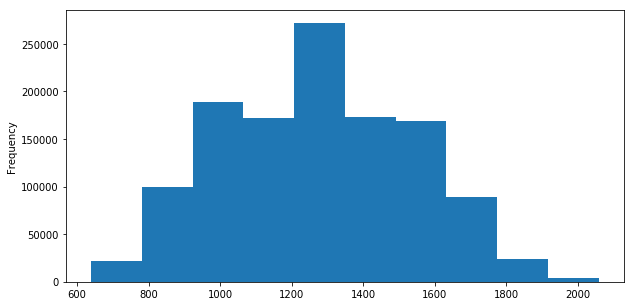

In [22]:
foo['Time'].plot.hist()

In [24]:
foo['Time'].min(), foo['Time'].max(), foo['Time'].max() - foo['Time'].min()

(640, 2058, 1418)

In [27]:
len(foo['TournamentNum'].unique())

42

In [28]:
foo.iloc[0]

TourCode                                                R
TourDescription                                  PGA TOUR
Year                                                 2017
TournamentNum                                          10
PlayerNum                                            1810
CourseNum                                             552
PermanentTournamentNum                                464
PlayerFirstName                                      Phil
PlayerLastName                                  Mickelson
Round                                                   1
TournamentName                               Safeway Open
CourseName                 Silverado Resort and Spa North
Hole                                                    1
HoleScore                                               5
ParValue                                                4
Yardage                                               436
Shot                                                    1
ShotType      

In [29]:
foo.dtypes

TourCode                   category
TourDescription            category
Year                         uint16
TournamentNum                uint16
PlayerNum                    uint16
CourseNum                    uint16
PermanentTournamentNum       uint16
PlayerFirstName            category
PlayerLastName             category
Round                         uint8
TournamentName             category
CourseName                 category
Hole                          uint8
HoleScore                   float32
ParValue                      uint8
Yardage                      uint16
Shot                          uint8
ShotType                   category
NumStrokes                    uint8
FromLocationScorer         category
FromLocationEnhanced         object
ToLocationScorer           category
ToLocationEnhanced         category
Distance                     uint16
DistanceToPin                uint16
InTheHoleFlag              category
AroundTheGreenFlag         category
FirstPuttFlag              c

In [14]:
foo['Date'] = pd.to_datetime(foo['Date'])

In [15]:
foo.dtypes

TourCode                         category
TourDescription                  category
Year                               uint16
TournamentNum                      uint16
PlayerNum                          uint16
CourseNum                          uint16
PermanentTournamentNum             uint16
PlayerFirstName                  category
PlayerLastName                   category
Round                               uint8
TournamentName                   category
CourseName                       category
Hole                                uint8
HoleScore                         float32
ParValue                            uint8
Yardage                            uint16
Shot                                uint8
ShotType                         category
NumStrokes                          uint8
FromLocationScorer               category
FromLocationEnhanced               object
ToLocationScorer                 category
ToLocationEnhanced               category
Distance                          

In [18]:
str(foo['Date'].dtype)

'datetime64[ns]'

In [14]:
foo = shotlink.get_shots([2011], data_path)
foo.shape

(1125170, 43)

In [15]:
foo[foo['Date'] == '12/30/1899']

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,XCoordinate,YCoordinate,ZCoordinate,DistanceFromCenter,DistanceFromEdge,Date,LeftRight,StrokesGainedBaseline,StrokesGainedCategory,RecoveryShot
210142,R,PGA TOUR,2011,100,1381,734,10,Fred,Funk,1,...,"11,037.8140","11,212.6590",13.6290,237,135,12/30/1899,L,0.132,Off the Tee,No


In [16]:
foo.loc[210142]['Date']

'12/30/1899'

In [17]:
foo.dtypes['Date']

dtype('O')

In [18]:
foo_prepared = shotlink.prepare_shots(foo)
foo_prepared.shape

(1125170, 43)

In [21]:
foo_prepared.dtypes['Date']

dtype('<M8[ns]')

In [22]:
foo_prepared.loc[210142]['Date']

Timestamp('2011-03-03 00:00:00')

In [25]:
foo_prepared[210142 - 5:210142 + 5]

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,XCoordinate,YCoordinate,ZCoordinate,DistanceFromCenter,DistanceFromEdge,Date,LeftRight,StrokesGainedBaseline,StrokesGainedCategory,RecoveryShot
210137,R,PGA TOUR,2011,100,1161,734,10,Mark,Calcavecchia,1,...,"11,721.8550","10,504.8570",15.0190,195,469,2011-03-03,L,-0.099,Off the Tee,No
210138,R,PGA TOUR,2011,100,1161,734,10,Mark,Calcavecchia,1,...,"12,029.8870","10,996.0090",12.4520,387,0,2011-03-03,R,-0.052,Approach to the Green,No
210139,R,PGA TOUR,2011,100,1161,734,10,Mark,Calcavecchia,1,...,"12,287.3800","11,255.6980",14.9770,146,209,2011-03-03,NaN,-0.212,Approach to the Green,No
210140,R,PGA TOUR,2011,100,1161,734,10,Mark,Calcavecchia,1,...,"12,269.0940","11,249.5880",14.6310,51,250,2011-03-03,L,-0.254,Around the Green,No
210141,R,PGA TOUR,2011,100,1161,734,10,Mark,Calcavecchia,1,...,.0000,.0000,.0000,0,0,2011-03-03,NaN,0.302,Putting,No
210142,R,PGA TOUR,2011,100,1381,734,10,Fred,Funk,1,...,"11,037.8140","11,212.6590",13.6290,237,135,2011-03-03,L,0.132,Off the Tee,No
210143,R,PGA TOUR,2011,100,1381,734,10,Fred,Funk,1,...,"10,743.7660","11,139.5740",15.6070,420,157,2011-03-03,R,-0.230,Approach to the Green,No
210144,R,PGA TOUR,2011,100,1381,734,10,Fred,Funk,1,...,"10,751.0090","11,096.3160",16.6180,88,414,2011-03-03,L,-0.428,Putting,No
210145,R,PGA TOUR,2011,100,1381,734,10,Fred,Funk,1,...,.0000,.0000,.0000,0,0,2011-03-03,NaN,0.459,Putting,No
210146,R,PGA TOUR,2011,100,1381,734,10,Fred,Funk,1,...,"10,062.6670","11,701.5800",14.1800,474,78,2011-03-03,R,0.025,Off the Tee,No


In [31]:
list(range(2008, 2018))

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [69]:
shots_all_years = shotlink.get_shots(range(2008, 2018), data_path)
shots_all_years.shape

(11365769, 43)

The first time I ran the line below I got back 11,555mb, or ~11.5gb, however, my machine only shows Python using ~2.1gb total. The code below seems to run pretty quickly too.

In [70]:
mem_usage(shots_all_years)

'11555.21 MB'

In [75]:
shots_all_years[shots_all_years['CourseName'] == 'PGA National (Champion)']['Date'].value_counts(dropna=False)

03/03/2011    10714
03/04/2010    10483
02/25/2016    10475
03/05/2009    10421
02/26/2015    10410
02/28/2008    10405
03/04/2011    10340
02/26/2016    10328
02/29/2008    10316
03/01/2012    10286
03/02/2012    10250
02/27/2014    10210
03/06/2009    10176
02/28/2013    10106
02/23/2017    10070
03/05/2010    10056
02/28/2014    10042
03/01/2013    10025
02/24/2017     9903
03/01/2015     8046
02/27/2015     7225
03/05/2011     5681
03/02/2008     5673
03/07/2009     5651
03/03/2013     5596
02/28/2016     5571
03/01/2014     5570
02/27/2016     5558
03/03/2012     5543
03/04/2012     5541
03/02/2013     5523
03/01/2008     5454
03/06/2011     5408
03/07/2010     5403
03/06/2010     5309
03/08/2009     5123
02/26/2017     5099
03/02/2014     5017
02/25/2017     4925
02/28/2015     3228
03/02/2015     1876
12/30/1899        1
Name: Date, dtype: int64

In [76]:
shots_all_years[shots_all_years['Date'] == '12/30/1899']

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,XCoordinate,YCoordinate,ZCoordinate,DistanceFromCenter,DistanceFromEdge,Date,LeftRight,StrokesGainedBaseline,StrokesGainedCategory,RecoveryShot
3713977,R,PGA TOUR,2011,100,1381,734,10,Fred,Funk,1,...,"11,037.8140","11,212.6590",13.6290,237,135,12/30/1899,L,0.132,Off the Tee,No


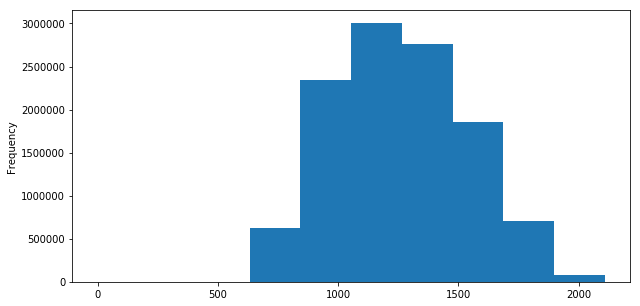

In [37]:
shots_all_years['Time'].plot.hist()

In [36]:
shots_all_years['Time'].min(), shots_all_years['Time'].max()

(0, 2109)

In [38]:
len(shots_all_years['Year'].unique())

10

In [39]:
len(shots_all_years['TournamentNum'].unique())

50

Total number of tournaments, for all years (I think).

In [41]:
len(shots_all_years.groupby(['Year','TournamentNum']).size())

392

In [43]:
foo.groupby(['TournamentNum','CourseName']).size()

TournamentNum  CourseName                    
10             Silverado Resort and Spa North    30418
30             CC of Jackson                     29723
50             TPC Summerlin                     30101
60             El Camaleon GC                    28562
70             Sea Island Resort (Plantation)    10969
               Sea Island Resort (Seaside)       21222
110            Plantation Course at Kapalua       9063
120            Waialae CC                        30430
130            La Quinta CC                      10910
               Nicklaus Tournament Course        11120
               Stadium Course                    16856
140            Torrey Pines (North)              11101
               Torrey Pines GC (South)           22523
150            TPC Scottsdale                    29217
160            Monterey Peninsula CC             11026
               Pebble Beach GL                   15908
               Spyglass Hill GC                  11116
170            Rivi

In [44]:
foo.groupby(['TournamentName','CourseName']).size()

TournamentName                                         CourseName                    
Safeway Open                                           Silverado Resort and Spa North    30418
Sanderson Farms Championship                           CC of Jackson                     29723
Shriners Hospitals for Children Open                   TPC Summerlin                     30101
OHL Classic at Mayakoba                                El Camaleon GC                    28562
The RSM Classic                                        Sea Island Resort (Plantation)    10969
                                                       Sea Island Resort (Seaside)       21222
SBS Tournament of Champions                            Plantation Course at Kapalua       9063
Sony Open in Hawaii                                    Waialae CC                        30430
CareerBuilder Challenge                                La Quinta CC                      10910
                                                       Nick